In [1]:
# 데이터 불러오기
from sklearn import datasets
raw_wine = datasets.load_wine()

In [2]:
# 피처/타깃 데이터 지정
X = raw_wine.data
y = raw_wine.target

In [3]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state=1)

In [4]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [5]:
# 커널 pca를 통한 데이터 차원 축소
from sklearn.decomposition import KernelPCA
k_pca = KernelPCA(n_components=2, kernel='poly')
k_pca.fit(X_tn_std)
X_tn_kpca = k_pca.transform(X_tn_std)
X_te_kpca = k_pca.transform(X_te_std)

In [6]:
# 차원 축소 전후 데이터 차원 비교
print(X_tn_std.shape)
print(X_tn_kpca.shape)

(133, 13)
(133, 2)


In [14]:
# 커널 pca이후 데이터 셋
import pandas as pdkpca_com
k_pca_columns = ['kpca_comp1','kpca_comp2']
X_tn_kpca_df = pd.DataFrame(X_tn_kpca,
                            columns=k_pca_columns)
X_tn_kpca_df['target'] = y_tn
X_tn_kpca_df.head(5)

,kpca_comp1,kpca_comp2,target
0,1.011805,0.049569,0
1,0.654061,-0.436790,1
2,1.211219,0.761903,0
3,2.784498,2.373693,0
4,2.027196,1.386201,0


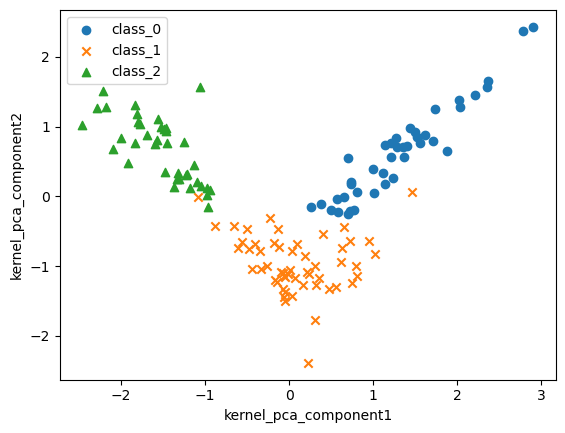

In [16]:
# 커널 pca 적용  데이터 시각화
import matplotlib.pyplot as plt
df = X_tn_kpca_df
markers = ['o','x','^']

for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    target_i = raw_wine.target_names[i]
    X1 = X_i['kpca_comp1']
    X2 = X_i['kpca_comp2']
    plt.scatter(X1,X2,
                marker=mark,
                label=target_i)
plt.xlabel('kernel_pca_component1')
plt.ylabel('kernel_pca_component2')
plt.legend()
plt.show()

In [17]:
# 데이터 학습 및 예측(랜덤 포레스트)
from sklearn.ensemble import RandomForestClassifier
clf_rf_kpca = RandomForestClassifier(max_depth=2,
                                     random_state=0)
clf_rf_kpca.fit(X_tn_kpca, y_tn)
pred_rf_kpca = clf_rf_kpca.predict(X_te_kpca)

In [18]:
# 정확도 평가
from sklearn.metrics import accuracy_score
accuracy_kpca = accuracy_score(y_te, pred_rf_kpca)
print(accuracy_kpca)

0.9555555555555556
